#CTGAN with LSTM as classifier

In [ ]:
# 1) Install CTGAN
!pip install ctgan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.2/74.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

Gen. (-1.90) | Discrim. (-0.02): 100%|██████████| 100/100 [00:12<00:00,  8.04it/s]


Augmented X shape: (327845, 30)
Augmented y shape: (327845,)
Train sequences: (327816, 30, 30), labels: (327816,)
Test  sequences: (56933, 30, 30),  labels: (56933,)


Model: "lstm_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        16,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,251 (63.48 KB)

 Trainable params: 16,251 (63.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
10245/10245 - 305s - 30ms/step - loss: 0.0110 - pr_auc: 0.9996 - precision: 0.9927 - recall: 0.9966 - roc_auc: 0.9996 - val_loss: 0.0031 - val_pr_auc: 0.7641 - val_precision: 0.8125 - val_recall: 0.7959 - val_roc_auc: 0.9383
Epoch 2/5
10245/10245 - 302s - 29ms/step - loss: 0.0022 - pr_auc: 0.9997 - precision: 0.9996 - recall: 0.9991 - roc_auc: 0.9997 - val_loss: 0.0030 - val_pr_auc: 0.8051 - val_precision: 0.8182 - val_recall: 0.8265 - val_roc_auc: 0.9432
Epoch 3/5
10245/10245 - 319s - 31ms/step - loss: 0.0021 - pr_auc: 0.9998 - precision: 0.9996 - recall: 0.9991 - roc_auc: 0.9997 - val_loss: 0.0029 - val_pr_auc: 0.8157 - val_precision: 0.8280 - val_recall: 0.7857 - val_roc_auc: 0.9436
Epoch 4/5
10245/10245 - 300s - 29ms/step - loss: 0.0020 - pr_auc: 0.9998 - precision: 0.9996 - recall: 0.9991 - roc_auc: 0.9998 - val_loss: 0.0028 - val_pr_auc: 0.8400 - val_precision: 0.8182 - val_recall: 0.8265 - val_roc_auc: 0.9433
Epoch 5/5
10245/10245 - 328s - 32ms/step - loss: 0.0019 - pr

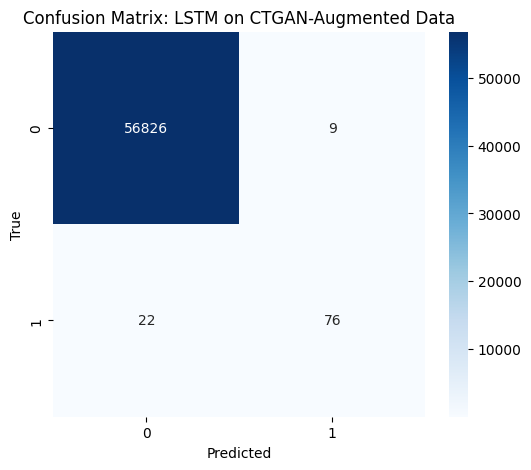

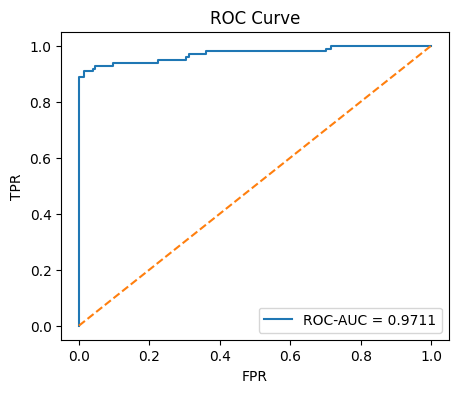

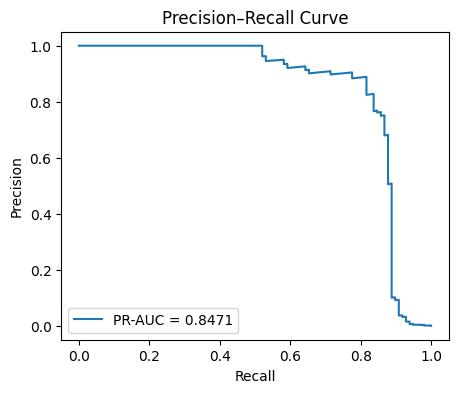

In [ ]:
# ============================
# Simple CTGAN + LSTM pipeline
# ============================

# --- 0) Imports ---
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from ctgan import CTGAN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, average_precision_score,
    roc_curve, precision_recall_curve
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall, AUC
import matplotlib.pyplot as plt
import seaborn as sns


tf.config.run_functions_eagerly(False)


df = pd.read_csv("creditcard.csv")
X = df.drop("Class", axis=1)
y = df["Class"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test),  columns=X_test.columns)


fraud_df = X_train_scaled[y_train == 1].reset_index(drop=True)


ctgan = CTGAN(
    embedding_dim=128,
    generator_dim=(256, 256),
    discriminator_dim=(256, 256),
    generator_lr=2e-4,
    generator_decay=1e-6,
    discriminator_lr=2e-4,
    discriminator_decay=1e-6,
    batch_size=500,
    epochs=100,
    pac=10,
    verbose=True
)
ctgan.fit(fraud_df)


N_SYNTH = 100_000   # was 250_000 in your snippet; reduce if you hit RAM limits
syn_fraud = ctgan.sample(N_SYNTH)

X_aug = pd.concat([X_train_scaled, syn_fraud], ignore_index=True)
y_aug = np.concatenate([y_train, np.ones(N_SYNTH, dtype=int)])

print(f"Augmented X shape: {X_aug.shape}")
print(f"Augmented y shape: {y_aug.shape}")


def create_sequences(X_arr, y_arr, seq_len):
    X_arr = np.asarray(X_arr)
    y_arr = np.asarray(y_arr)
    seqs, labels = [], []

    for i in range(len(X_arr) - seq_len + 1):
        seqs.append(X_arr[i : i + seq_len])
        labels.append(y_arr[i + seq_len - 1])
    return np.array(seqs), np.array(labels)

SEQ_LEN = 30
BATCH   = 32

# Important: we only scale features; labels are kept as 0/1
X_seq_train, y_seq_train = create_sequences(X_aug.values, y_aug, seq_len=SEQ_LEN)
X_seq_test,  y_seq_test  = create_sequences(X_test_scaled.values, y_test, seq_len=SEQ_LEN)

print(f"Train sequences: {X_seq_train.shape}, labels: {y_seq_train.shape}")
print(f"Test  sequences: {X_seq_test.shape},  labels: {y_seq_test.shape}")


n_features = X_aug.shape[1]

lstm = Sequential([
    tf.keras.Input(shape=(SEQ_LEN, n_features)),
    # recurrent_dropout>0 forces the generic (non-cuDNN) LSTM path
    LSTM(50, activation='tanh', recurrent_activation='sigmoid', recurrent_dropout=0.1),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
], name="lstm_classifier")

lstm.compile(
    optimizer=Adam(2e-4),
    loss='binary_crossentropy',
    metrics=[
        Precision(name='precision'),
        Recall(name='recall'),
        AUC(name='roc_auc'),
        AUC(name='pr_auc', curve='PR')
    ]
)
lstm.summary()


EPOCHS = 5  # increase if you can afford time
history = lstm.fit(
    X_seq_train, y_seq_train,
    epochs=EPOCHS,
    batch_size=BATCH,
    validation_data=(X_seq_test, y_seq_test),
    verbose=2
)


y_prob = lstm.predict(X_seq_test, batch_size=BATCH).ravel()
y_pred = (y_prob >= 0.5).astype(int)
y_true = y_seq_test

roc = roc_auc_score(y_true, y_prob)
pr  = average_precision_score(y_true, y_prob)
print(f"\nTest ROC-AUC: {roc:.4f}")
print(f"Test PR-AUC:  {pr:.4f}\n")

print("Classification Report:")
print(classification_report(y_true, y_pred, digits=4))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted"); plt.ylabel("True")
plt.title("Confusion Matrix: LSTM on CTGAN-Augmented Data")
plt.show()


fpr, tpr, _ = roc_curve(y_true, y_prob)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc:.4f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC Curve"); plt.legend()
plt.show()

prec, rec, _ = precision_recall_curve(y_true, y_prob)
plt.figure(figsize=(5,4))
plt.plot(rec, prec, label=f"PR-AUC = {pr:.4f}")
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision–Recall Curve"); plt.legend()
plt.show()


The LSTM model trained on CTGAN-augmented data achieves consistently strong performance in fraud detection, showing that synthetic data from CTGAN is highly effective at balancing class distribution and improving recall.

ROC-AUC: 0.9711 and PR-AUC: 0.8471 demonstrate excellent discriminatory ability, especially in separating fraud from non-fraud in an imbalanced setting.

For the fraud class (minority, class 1):

Precision: 0.8941, meaning almost 9 out of 10 flagged fraud cases are correct.

Recall: 0.7755, indicating the model detects around 78% of fraudulent transactions.

F1-score: 0.8306, confirming a strong balance between detection rate and reliability of predictions.

For the non-fraud class, results are nearly perfect, with >99.9% accuracy and only 9 false positives among ~56,800 normal transactions.

The confusion matrix shows the LSTM misses 22 fraud cases but correctly detects 76 fraudulent transactions, with very few false alarms.

Referneces-[A hybrid deep learning approach with generative adversarial network for credit card fraud detection](https://doi.org/10.3390/technologies12100186), [Improving detection of credit card fraudulent transactions using generative adversarial networks](https://arxiv.org/abs/1907.03355), [Predicting credit card fraud using conditional generative adversarial network](https://norma.ncirl.ie/6114/), https://www.kaggle.com/datasets/gauravduttakiit/credit-card-fraud-detection-gan,[ The importance of future information in credit card fraud detection](https://arxiv.org/abs/2204.05265), https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/code

Note- ChatGPT used for understanding results and help with lstm code to use less memory.